In [8]:
cd('./esercitazione_3')

Error using cd
Unable to change current folder to '/Users/alessioarcara/Downloads/universita/mnc2023/esercitazioni/esercitazione_3/./esercitazione_3' (Name is nonexistent or not a folder).

# Esercitazione 3: Script, Function e Numeri Finiti

## Precisione BASIC single e BASIC double
Matlab usa di default la precisione double e si può passare in precisione single mediante l’utilizzo della funzione single(). Poter alternare in un codice le precisioni single e double può essere molto utile a fini didattici.

* matlab mantiene la precisione assegnata

## A. Script `scompute u.m`
Lo script in oggetto calcola l’unità di arrotondamento U, sia in precisione single che double, mediante la seguente definizione operativa (ANSI/IEEE std.754): ”$U$ è il più grande numero finito positivo tale che $fl(U + 1) = 1$”.
Analizzare l’implementazione della definzione operativa e verificare i risultati prodotti nei casi single e double.

In [11]:
scompute_u()

u = 2^(-53) = 1.110223024625157e-16 
Largest Finite and Positive Number u such that u+1==1
1.110223024625157e-16
Exponent -53


## B. Ciclo while e numeri gradual underflow; script `sfiniti.m`
 Analizzare lo script che implementa un piccolo ciclo sia in versione BASIC single che BASIC double (vedi commenti) e stampa ad ogni iterazione un numero finito.

In [12]:
sfiniti()

(2 raised to the power -1) =   5.000000000000000e-01 
(2 raised to the power -2) =   2.500000000000000e-01 
(2 raised to the power -3) =   1.250000000000000e-01 
(2 raised to the power -4) =   6.250000000000000e-02 
(2 raised to the power -5) =   3.125000000000000e-02 
(2 raised to the power -6) =   1.562500000000000e-02 
(2 raised to the power -7) =   7.812500000000000e-03 
(2 raised to the power -8) =   3.906250000000000e-03 
(2 raised to the power -9) =   1.953125000000000e-03 
(2 raised to the power -10) =   9.765625000000000e-04 
(2 raised to the power -11) =   4.882812500000000e-04 
(2 raised to the power -12) =   2.441406250000000e-04 
(2 raised to the power -13) =   1.220703125000000e-04 
(2 raised to the power -14) =   6.103515625000000e-05 
(2 raised to the power -15) =   3.051757812500000e-05 
(2 raised to the power -16) =   1.525878906250000e-05 
(2 raised to the power -17) =   7.629394531250000e-06 
(2 raised to the power -18) =   3.814697265625000e-06 
(2 raised to the po

## C. Script `sexpression.m`
Viene effettuato il calcolo della semplice espressione

$$y = ((1+x)-1)/x$$

che dovrebbe sempre produrre come risultato il valore esatto 1, invece a seconda del valore assegnato ad x si ottengono risultati inattesi. Provare differenti valori per $x$ e dedurre per quali il risultato sarà corretto e per quali no. Usufruire dello script `sconv_dec2bin.m` che permette di convertire un numero decimale in base 2 e controlla se è rappresentabile in modo esatto.

* la rappresentazione non è un problema se è esatta
* se è molto grande il numero -> non viene sentita
* se è molto piccolo il numero -> cancellazione numerica
* il risultato dell'espressione non è più 1!

In [66]:
help sconv_dec2bin
help sexpression

 ************************************************
  z: numero reale
  k: numero max. di cifre per la parte frazionaria
  Codice per la conversione da base 10 a base 2
  di un numero in virgola
 ************************************************

 ***************************************************
  si vuole valutare l'espressione ((1+x)-1)/x
  con x numero finito e valutare l'E_ALG;
  utilizzare il programma conv_dec2bin.m per
  determinare se i valori x utilizzati hanno una 
  rappresentazione esatta in base 2 a 53 cifre
 ***************************************************



In [53]:
sconv_dec2bin(0.1, 53)

Converte un reale (parte intera e frazionaria) da base 10 a base 2
Il numero nella nuova base e':
0.00011001100110011001100110011001100110011001100110011
Rappresentazione NON esatta


In [68]:
sexpression(single(0.0000001))

 x                      y
 1.000000011686097e-07  1.192092895507812e+00

Err. relativo:  1.920928955078125e-01
calcolo errato


## D. Approssimazione della derivata; script `fidiff.m`
Sia f una funzione continua e derivabile e cerchiamo di approssimare il valore della derivata mediante il limite del rapporto incrementale

$$\lim_{h\to0} f(x+h)-f(x)$$

L’idea è di valutare il rapporto incrementale per un certo valore di $h$, ma quanto piccolo? Ponendo $h = 0$ si ottiene $0/0$, cioè NaN. Lo script in oggetto prova valori di $0$ da $10^0$ a $10^-14$ assumendo come $x$ il valore 1.0, se non ne viene fornito uno differente.

Lo script fa uso di precisione double. Si vede che l’approssimazione migliora al diminuire di $h$, ma quando $h$ diventa troppo piccolo, l’approssimazione comincia a peggiorare. Spiegarne il perché.

Osserviamo meglio l’output numerico; si nota che per valori grandi di $h$, l’errore assoluto diminuisce di un fattore 10 ogni volta che $h$ viene ridotto di un fattore 10, fino a che poi si ottengono risultati inattendibili. Spiegare il perché.

* Si osserva che l'errore tende a diminuire man mano che $h$ diventa più piccolo, ma solo fino a un certo punto. Oltre quel punto, l'errore inizia ad aumentare a causa della cancellazione numerica.
* La cancellazione numerica si verifica quando si sottraggono due numeri molto vicini tra loro, e questo fenomeno può portare alla perdita di precisione a causa delle limitazioni della rappresentazione numerica.

 h            fp           fpfd     AErr      RErr
 1.0e+00      2.71828      4.67077  1.95e+00  7.18e-01
 1.0e-01      2.71828      2.85884  1.41e-01  5.17e-02
 1.0e-02      2.71828      2.73192  1.36e-02  5.02e-03
 1.0e-03      2.71828      2.71964  1.36e-03  5.00e-04
 1.0e-04      2.71828      2.71842  1.36e-04  5.00e-05
 1.0e-05      2.71828      2.71830  1.36e-05  5.00e-06
 1.0e-06      2.71828      2.71828  1.36e-06  5.00e-07
 1.0e-07      2.71828      2.71828  1.40e-07  5.15e-08
 1.0e-08      2.71828      2.71828  6.60e-09  2.43e-09
 1.0e-09      2.71828      2.71828  2.15e-07  7.93e-08
 1.0e-10      2.71828      2.71828  1.55e-06  5.69e-07
 1.0e-11      2.71828      2.71831  3.26e-05  1.20e-05
 1.0e-12      2.71828      2.71871  4.32e-04  1.59e-04
 1.0e-13      2.71828      2.71783  4.56e-04  1.68e-04
 1.0e-14      2.71828      2.70894  9.34e-03  3.44e-03


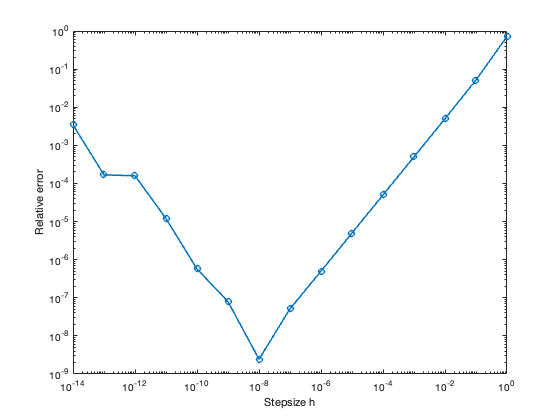

In [70]:
fidiff()

## E. Sull’Errore Inerente nella valutazione di una funzione
L’errore inerente misura l’accuratezza che ci si può aspettare nel risolvere un problema in una data precisione, indipendentemente dall’algoritmo usato. Se consideriamo il problema di valutare una funzione reale di variabile reale derivabile almeno due volte avremo la seguente stima del numero di condizione di f in x:

$$C(f,x)=\frac{|xf'(x)|}{|f(x)|}$$

Quante cifre esatte del risultato ci aspettiamo nel valutare $f(x)$? Ricordando la stima dell'errore inerente

$$\frac{|f(\tilde{x})-f(x)|}{|f(x)|}\approx C(f,x)\frac{|\tilde{x}-x|}{|x|}$$

e applicando il logaritmo in base 10 e poi cambiando segno si ha:

$$-\log_{10}(\frac{|f(\tilde{x})-f(x)|}{|f(x)|})\approx-\log_{10}(\frac{|\tilde{x}-x|}{x})-\log_{10}(C(f,x))$$

Il membro di sinistra rappresenta il numero di cifre esatte con cui $f(\tilde{x})$ approssima $f(x)$, così come il primo termine del membro di destra rappresenta il numero di cifre con cui $\tilde{x}$ approssima $x$ e che sappiamo quante sono a seconda della precisione di rappresentazione usata. Quindi la stima del numero di cifre che si ottengono nel risultato si ottiene sottraendo la quantità $\log_{10}(C(f,x))$ al numero di cifre corrispondente alla precisione usata.

Se consideriamo la funzione $\sin(x)$, teoricamente si ottiene:

| f   | x    | f(x) | f'(x) | C(f, x)  | log10(C(f, x)) |
|-----|------|------|-------|----------|----------------|
| sin | pi   | 0    | -1    | infinity | infinity       |
| sin | pi/2 | 1    | 0     | 0        | -infinity      |
| sin | 0    | 0    | 1     | NaN      | NaN            |

Si consideri lo script `scond_sin.m` che calcola l’Errore Inerente tra il valore calcolato in doppia precisione (che assumeremo come risultato esatto a partire da un dato esatto) ed il valore calcolato in precisione singola (che assumeremo come risultato esatto, ma a partire da un dato perturbato) per sperimentare se numericamente si ha un comportamento in linea con quanto previsto teoricamente.

Si modifichi lo script per provare i valori indicati in tabella, con $\text{eps}1 = 2^{-12}$ e $\text{eps}2 = 2^{-24}$. Dai risultati ottenuti che considerazioni si possono fare?

In [73]:
scond_sin()

 xD                      f(xS)           f(xD)                 Erel        -log10(Erel)  Cond  log10(cond)
 3.141592653589793e+00  -8.7422777e-08   1.224646799147353e-16 7.138611e+08  -9  2.565305e+16   16
 3.141836794214793e+00  -2.4422805e-04  -2.441406225745583e-04 3.581146e-04   3  1.286896e+04    4
 3.141592713194438e+00  -8.7422777e-08  -5.960464465292591e-08 4.667108e-01   0  5.270718e+07    8
 1.570796326794897e+00   1.0000000e+00   1.000000000000000e+00 0.000000e+00 Inf  9.618353e-17  -16
 1.571040467419897e+00   9.9999994e-01   9.999999701976777e-01 2.980232e-08   8  3.835548e-04   -3
 1.570796386399541e+00   1.0000000e+00   9.999999999999982e-01 1.776357e-15  15  9.362676e-08   -7
 2.441406250000000e-04   2.4414062e-04   2.441406225746808e-04 9.934108e-09   8  1.000000e+00   -0
 5.960464477539062e-08   5.9604645e-08   5.960464477539059e-08 5.551115e-16  15  1.000000e+00   -0


1. **Caso $ \pi $**: Con un $ C(f, x) $ infinito, anche piccole perturbazioni nell'input $ x $ dovrebbero portare a grandi variazioni in $ f(x) $. L'effetto di $ \text{eps1} $ e $ \text{eps2} $ sarà quindi molto rilevante: più sono piccoli, meno ampio sarà l'errore, ma rimarrà comunque elevato.
2. **Caso $ \pi/2 $**: Poiché $ C(f, x) = 0 $, la funzione è ben condizionata in questo punto. Pertanto, piccole perturbazioni in $ x $ dovrebbero avere poco effetto su $ f(x) $, indipendentemente dai valori di $ \text{eps1} $ e $ \text{eps2} $.
3. **Casi Speciali (0)**: In questo caso, $ C(f, x) $ è indefinito, il che rende difficile fare previsioni precise. Tuttavia, con valori di $ \text{eps1} $ e $ \text{eps2} $ più piccoli, ci si può aspettare generalmente un errore inerente minore.


## F. Esercizio di verifica
Nella function `compound.m` viene implementata, in BASIC single, la formula dell’interesse composto.

In generale, se si investe $a_0$ euro ad un interesse composto $x$, $n$ volte all’anno, alla fine dell’anno il valore è $a_0C_n(x)$ euro, dove
$$ Cn(x) = (1 + \frac{x}{n})^n $$

si devono valutare 5 algoritmi che implementano diverse operazioni e dobbiamo vedere qual è il migliore tra questi

modificare compound in modo tale RITORNI i risultati nei 5 diversi modi e implementare `scompound` in modo tale che produca una tabella con iterazioni=[50,100,1000,10000,...]

Per quanto spiegato, aumentando n, il valore deve tendere ad $e^x$. I risultati ottenuti con i differenti Algoritmi non sono tutti uguali fra loro; quali sono i corretti? Come ci si spiega quanto ottenuto?
* alg1,alg2,alg3 corrotti
* l'identità logaritmica è più stabile ma subentra quel 1+x/n e quando n è molto grande, sto aggiungendo a 1 qualcosa molto piccolo
* alg4,alg5 non corrotti 

In [86]:
scompound(0.5)

    n_vect     alg1      alg2      alg3      alg4      alg5 
    ______    ______    ______    ______    ______    ______

       50     1.6446    1.6446    1.6446    1.6446    1.6446
      100     1.6467    1.6467    1.6467    1.6467    1.6467
     1000     1.6485    1.6485    1.6485    1.6485    1.6485
    10000     1.6479    1.6479    1.6479    1.6487    1.6487
    1e+05     1.6498    1.6498    1.6498    1.6487    1.6487
    1e+06     1.6028     1.611     1.611    1.6487    1.6487



* 